In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data-ori.csv')

In [3]:
print(df.head())

   HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         35.1          11.8         4.65        6.3          310  25.4  33.6   
1         43.5          14.8         5.39       12.7          334  27.5  34.0   
2         33.5          11.3         4.74       13.2          305  23.8  33.7   
3         39.1          13.7         4.98       10.5          366  27.5  35.0   
4         30.9           9.9         4.23       22.1          333  23.4  32.0   

    MCV  AGE SEX SOURCE  
0  75.5    1   F    out  
1  80.7    1   F    out  
2  70.7    1   F    out  
3  78.5    1   F    out  
4  73.0    1   M    out  


In [4]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64


In [5]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
       HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE    LEUCOCYTE  THROMBOCYTE  \
count  4412.000000   4412.000000  4412.000000  4412.000000  4412.000000   
mean     38.197688     12.741727     4.541260     8.718608   257.524479   
std       5.974784      2.079903     0.784091     5.049041   113.972365   
min      13.700000      3.800000     1.480000     1.100000     8.000000   
25%      34.375000     11.400000     4.040000     5.675000   188.000000   
50%      38.600000     12.900000     4.570000     7.600000   256.000000   
75%      42.500000     14.200000     5.050000    10.300000   321.000000   
max      69.000000     18.900000     7.860000    76.600000  1183.000000   

               MCH         MCHC          MCV          AGE  
count  4412.000000  4412.000000  4412.000000  4412.000000  
mean     28.234701    33.343042    84.612942    46.626473  
std       2.672639     1.228664     6.859101    21.731218  
min      14.900000    26.000000    54.000000     1.000000  
25% 

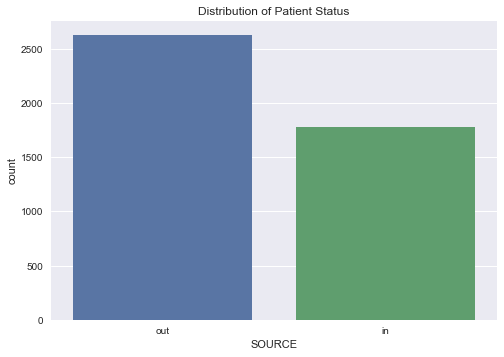

In [6]:
    sns.countplot(x='SOURCE', data=df)
    plt.title('Distribution of Patient Status')
    plt.show()

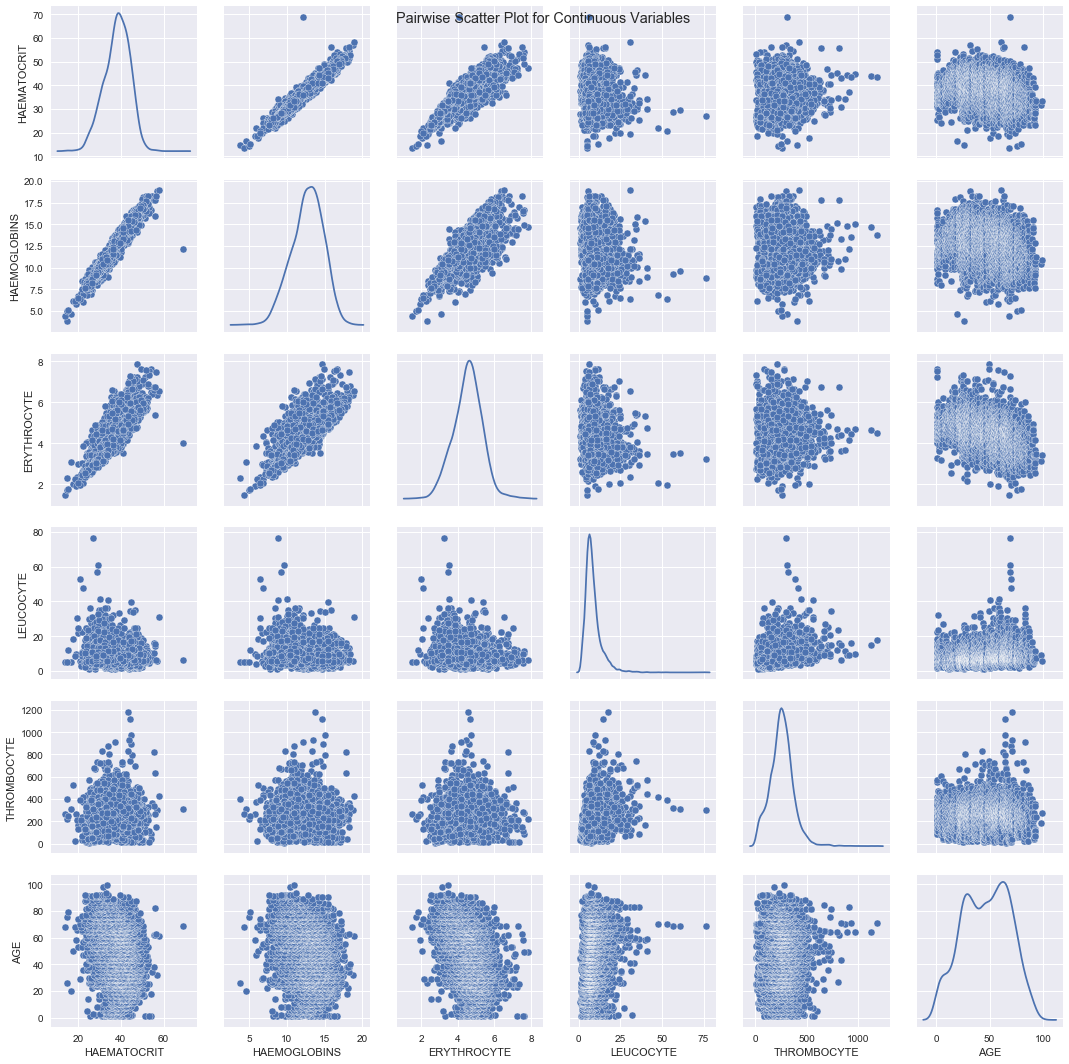

In [7]:
# Pairwise scatter plot for continuous variables
sns.pairplot(df[['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'AGE']], diag_kind='kde')
plt.suptitle('Pairwise Scatter Plot for Continuous Variables')
plt.show()

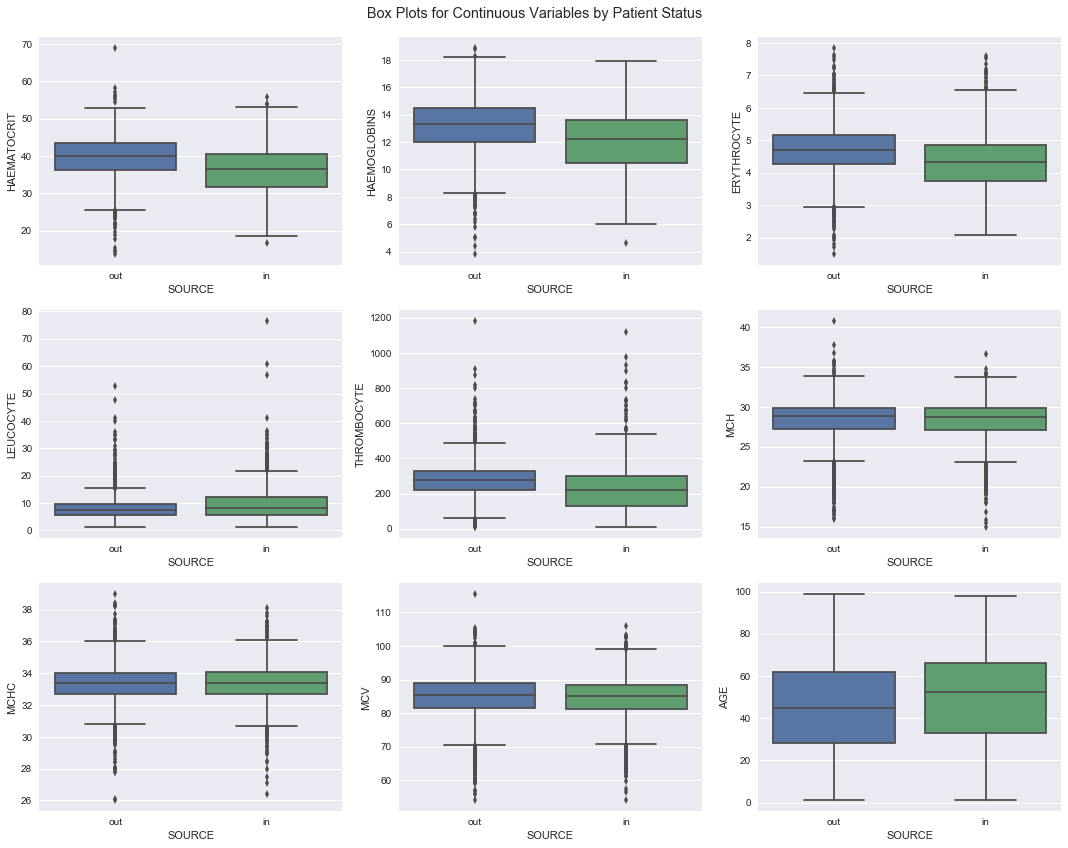

In [8]:
# Box plots for continuous variables by patient status
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle('Box Plots for Continuous Variables by Patient Status')

for i, column in enumerate(['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE']):
    sns.boxplot(x='SOURCE', y=column, data=df, ax=axes[i // 3, i % 3])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


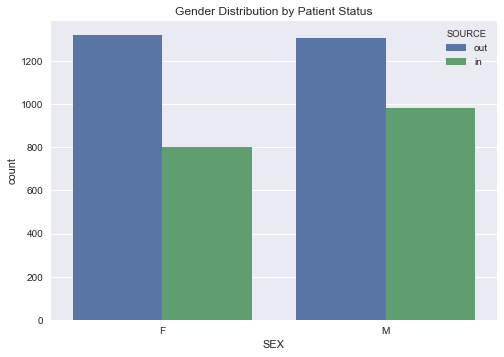

In [9]:
# Bar plot for gender distribution by patient status
sns.countplot(x='SEX', hue='SOURCE', data=df)
plt.title('Gender Distribution by Patient Status')
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt


In [12]:
df_encoded = pd.get_dummies(df, columns=['SEX'])

# Drop the 'SOURCE' column as it's our target/label, not a feature
X = df_encoded.drop('SOURCE', axis=1)


In [13]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

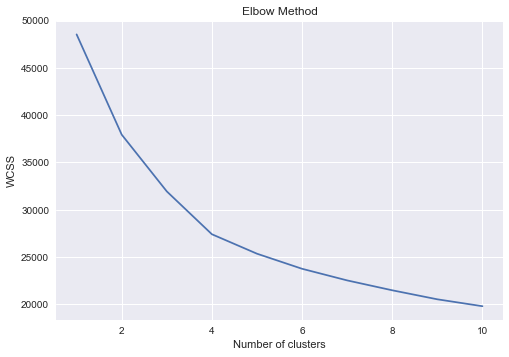

In [14]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster information to the original dataframe
df['Cluster'] = y_kmeans

print(df[['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX', 'SOURCE', 'Cluster']].head())


   HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         35.1          11.8         4.65        6.3          310  25.4  33.6   
1         43.5          14.8         5.39       12.7          334  27.5  34.0   
2         33.5          11.3         4.74       13.2          305  23.8  33.7   
3         39.1          13.7         4.98       10.5          366  27.5  35.0   
4         30.9           9.9         4.23       22.1          333  23.4  32.0   

    MCV  AGE SEX SOURCE  Cluster  
0  75.5    1   F    out        2  
1  80.7    1   F    out        2  
2  70.7    1   F    out        2  
3  78.5    1   F    out        2  
4  73.0    1   M    out        0  


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Assuming X_scaled is your scaled dataset and y_kmeans are your cluster labels

# Silhouette Score
silhouette_avg = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score: {silhouette_avg}")

# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X_scaled, y_kmeans)
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_scaled, y_kmeans)
print(f"Davies-Bouldin Index: {davies_bouldin}")


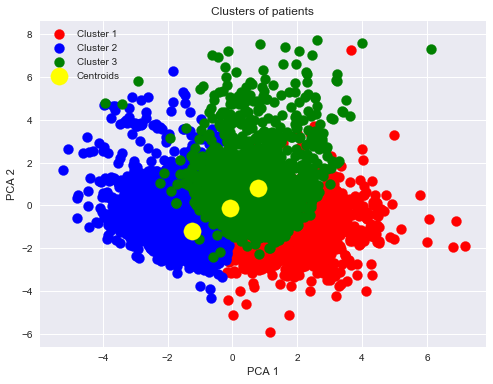

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA and reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_pca[y_kmeans == 2, 0], X_pca[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of patients')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()


Cluster 1:
Possible Characteristics: This cluster might represent patients with certain commonalities in their laboratory test results that differ significantly from those in the other clusters. For example, if Cluster 1 has lower average HAEMATOCRIT and HAEMOGLOBINS levels compared to the other clusters, it could suggest that these patients have conditions related to anemia or blood disorders.
Interpretation Approach: Look at the centroid or the average value of features within this cluster to deduce common characteristics. If most patients in Cluster 1 have low HAEMATOCRIT and HAEMOGLOBINS but normal ERYTHROCYTE counts, it might suggest a specific type of anemia or nutritional deficiency.
Cluster 2:
Possible Characteristics: If this cluster groups patients with higher LEUCOCYTE counts and other specific markers, it might indicate infections or inflammatory diseases. The exact interpretation would depend on how these patients' data points differ in their laboratory results from those in Clusters 1 and 3.
Interpretation Approach: Analyzing the average or median values of the laboratory tests for patients in this cluster can help identify any common trends or abnormalities that suggest a particular health condition or disease category.
Cluster 3:
Possible Characteristics: This cluster could represent patients with relatively normal or specific patterns in their test results that are not captured by the other two clusters. For example, if Cluster 3 has patients with higher THROMBOCYTE counts, they might be at risk for or suffering from conditions affecting blood clotting.
Interpretation Approach: Similar to the other clusters, reviewing the central tendency and distribution of laboratory test results can provide insights into the commonalities among patients in this cluster, potentially indicating a risk group or a common set of conditions.

In [18]:
import pandas as pd

# Assuming df is your original DataFrame with cluster labels and features
# Replace 'Cluster' with the actual column name containing cluster labels

# Create separate DataFrames for each cluster
cluster_1_df = df[df['Cluster'] == 0].copy()
cluster_2_df = df[df['Cluster'] == 1].copy()
cluster_3_df = df[df['Cluster'] == 2].copy()

# Add a new column 'Cluster_Label' to identify the cluster
cluster_1_df['Cluster_Label'] = 'Cluster 1'
cluster_2_df['Cluster_Label'] = 'Cluster 2'
cluster_3_df['Cluster_Label'] = 'Cluster 3'

# Concatenate the individual DataFrames into a single DataFrame
labeled_cluster_df = pd.concat([cluster_1_df, cluster_2_df, cluster_3_df])

# Display the head of the labeled DataFrame
print(labeled_cluster_df[['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX', 'SOURCE', 'Cluster', 'Cluster_Label']].head())


     HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  \
4           30.9           9.9         4.23       22.1          333  23.4   
38          28.1           9.3         4.19       23.4          382  22.2   
89          30.1          10.1         3.93        6.5          236  25.7   
136         24.2           8.0         3.17        4.6           75  25.2   
194         29.8          10.1         3.83       10.4          215  26.4   

     MCHC   MCV  AGE SEX SOURCE  Cluster Cluster_Label  
4    32.0  73.0    1   M    out        0     Cluster 1  
38   33.1  67.1    2   M    out        0     Cluster 1  
89   33.6  76.6    3   M    out        0     Cluster 1  
136  33.1  76.3    5   M    out        0     Cluster 1  
194  33.9  77.8    8   M    out        0     Cluster 1  


In [19]:
# Save each labeled cluster DataFrame to a separate CSV file
cluster_1_df.to_csv('cluster_1_data.csv', index=False)
cluster_2_df.to_csv('cluster_2_data.csv', index=False)
cluster_3_df.to_csv('cluster_3_data.csv', index=False)


In [ ]:
# Combine all three labeled cluster DataFrames into one
combined_df = pd.concat([cluster_1_df, cluster_2_df, cluster_3_df], ignore_index=True)

# Add a new column 'Cluster_Label' to identify the combined dataset
combined_df['Cluster_Label'] = 'Patient Segmented Dataset'

# Save the combined DataFrame as a CSV file
combined_df.to_csv('patient_segmented_dataset.csv', index=False)


In [21]:
    # Assuming df is your original DataFrame with cluster labels
    # Replace 'Cluster' with the actual column name containing cluster labels

    # Create a copy of the original DataFrame to avoid modifying it directly
    df_with_disease_labels = df.copy()

    # Define a function to update cluster labels based on characteristics
    def update_cluster_labels(row):
        if row['Cluster'] == 0:
            return 'Anemia or Blood Disorders'
        elif row['Cluster'] == 1:
            return 'Infections or Inflammatory Diseases'
        elif row['Cluster'] == 2:
            return 'Conditions affecting Blood Clotting'
        else:
            return 'Other'

    # Apply the function to create a new column 'Disease_Label'
    df_with_disease_labels['Disease_Label'] = df.apply(update_cluster_labels, axis=1)

    # Display the head of the DataFrame with updated labels
    print(df_with_disease_labels[['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX', 'SOURCE', 'Cluster', 'Disease_Label']].head())


   HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         35.1          11.8         4.65        6.3          310  25.4  33.6   
1         43.5          14.8         5.39       12.7          334  27.5  34.0   
2         33.5          11.3         4.74       13.2          305  23.8  33.7   
3         39.1          13.7         4.98       10.5          366  27.5  35.0   
4         30.9           9.9         4.23       22.1          333  23.4  32.0   

    MCV  AGE SEX SOURCE  Cluster                        Disease_Label  
0  75.5    1   F    out        2  Conditions affecting Blood Clotting  
1  80.7    1   F    out        2  Conditions affecting Blood Clotting  
2  70.7    1   F    out        2  Conditions affecting Blood Clotting  
3  78.5    1   F    out        2  Conditions affecting Blood Clotting  
4  73.0    1   M    out        0            Anemia or Blood Disorders  


In [ ]:
# Save the DataFrame with updated disease labels as a CSV file
df_with_disease_labels.to_csv('patient_segmented_disease_dataset.csv', index=False)